<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/statistics/Monte_Carlo_Simulation_for_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Sampling for mean

[This is based on Mike Cohans course](https://www.udemy.com/course/python-scientific-x/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

True mean for population: 108.56446524669427



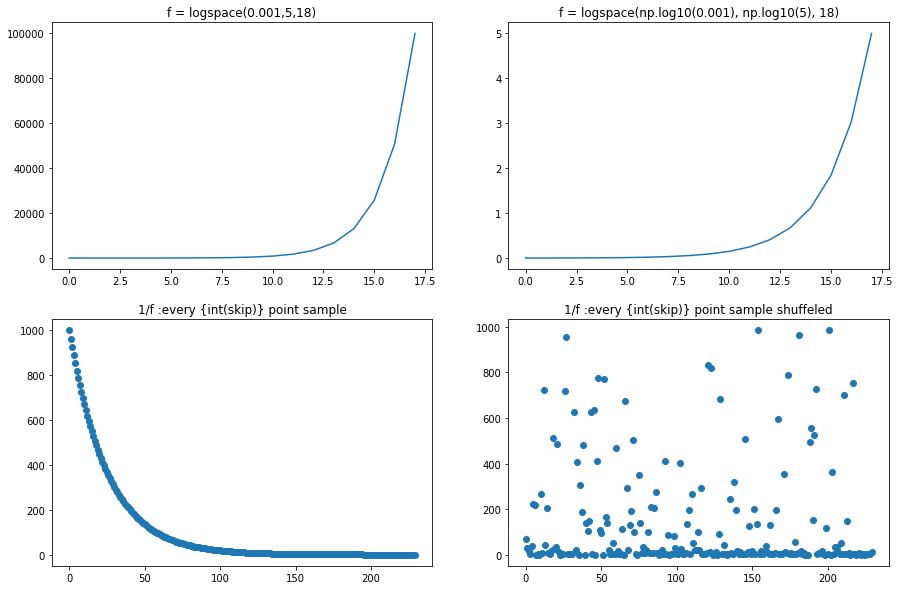

In [2]:
#####
##     Simulation Parameter
#####
# Generate a population of numbers
population_size = 2.3e5

####
#  one over f distribution
###
# logspace 10^1 ... 10^5
f1 = np.logspace(0.001,5,18)
# to get from 1..5 we have to add log
f2 = np.logspace(np.log10(0.001), np.log10(5), 18)
# generate the population
population = 1 / np.logspace(np.log10(0.001), np.log10(10), int(population_size))

# true mean
true_mean = np.mean(population)
print(f"True mean for population: {true_mean}\n")
 #ploting
fig, axs = plt.subplots(2,2, figsize=(15,10))

ax= axs[0][0]
ax.set_title("f = logspace(0.001,5,18)")
ax.plot(f1)

ax = axs[0][1]
ax.set_title("f = logspace(np.log10(0.001), np.log10(5), 18)")
ax.plot(f2)

ax = axs[1][0]
skip = 1e3
ax.set_title("1/f :every {int(skip)} point sample")
ax.plot(population[::int(skip)], 'o')

ax = axs[1][1]
ax.set_title("1/f :every {int(skip)} point sample shuffeled")
np.random.shuffle(population)
ax.plot(population[::int(skip)], 'o')

plt.show()

In [3]:
%whos

Variable          Type           Data/Info
------------------------------------------
ax                AxesSubplot    AxesSubplot(0.547727,0.125;0.352273x0.343182)
axs               ndarray        2x2: 4 elems, type `object`, 32 bytes
f1                ndarray        18: 18 elems, type `float64`, 144 bytes
f2                ndarray        18: 18 elems, type `float64`, 144 bytes
fig               Figure         Figure(1080x720)
np                module         <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt               module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
population        ndarray        230000: 230000 elems, type `float64`, 1840000 bytes (1.7547607421875 Mb)
population_size   float          230000.0
skip              float          1000.0
true_mean         float64        108.56446524669427


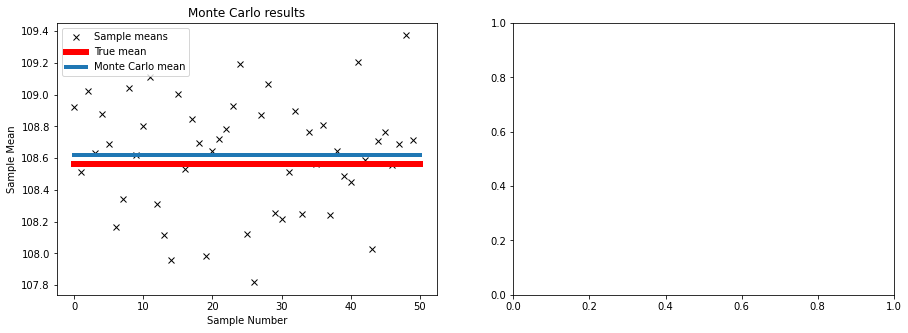

In [16]:
######
#.     Monte Carlo Sampling and calculating mean
######
sample_size = int(2.3e5)
number_of_samples = 50

sample_means = np.zeros(number_of_samples)
#actual Monte Carlo sampling 
for expi in range(number_of_samples): 
  exp_sample = np.random.choice(population, size = sample_size)
  sample_means[expi] = np.mean(exp_sample)

monte_carlo_mean = np.mean(sample_means)
# plotting
fig, axs = plt.subplots(1,2, figsize=(15,5))
ax = axs[0]
ax.set_title("Monte Carlo results")
ax.plot(sample_means,'kx', label="Sample means")
ax.plot([0, number_of_samples],[true_mean, true_mean], 'r', linewidth = 6, label="True mean")
ax.plot([0, number_of_samples], [monte_carlo_mean,monte_carlo_mean], linewidth =4 ,label="Monte Carlo mean")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Sample Mean")

ax.legend()

plt.show()

136.3868605958444